Autor: Gabriel de Sousa Botelho

Formação: Cientista da Computação pela UFC

Contato:
  
  📧 gabrielsbotelho12@gmail.com
  
  👉 [LinkedIn](https://www.linkedin.com/in/gabriel-botelhoo/)
  
  👉 [Github](https://github.com/GabrielSBotelho)


# Projeto de Árvore de Decisão de Regressão

* Objetivo: Avaliar o dataset e a partir de seus dados criar um modelo de árvore de decisão de regressão.

* Objetivos Específicos:
  
  1. Importar e tratar base de dados
  2. Avaliar melhor valor da parâmetro *'min_sample_leaf'* baseado na métrica *mean_scored_error*
  3. Criar modelo de ávore de decisão de regressão
  4. Avaliar resultados

Os dados utilizados neste projeto podem ser encontrados [aqui](https://www.kaggle.com/kolawale/focusing-on-mobile-app-or-website).

## Importando Dados

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
path = '/content/drive/MyDrive/Data Science/Dados/E-commerce Customers/Ecommerce Customers'
dataframe = pd.read_csv(path)
dataframe.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
dataframe.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
dataframe.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [7]:
data = dataframe.drop(columns=['Email', 'Address', 'Avatar'], axis=1)
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


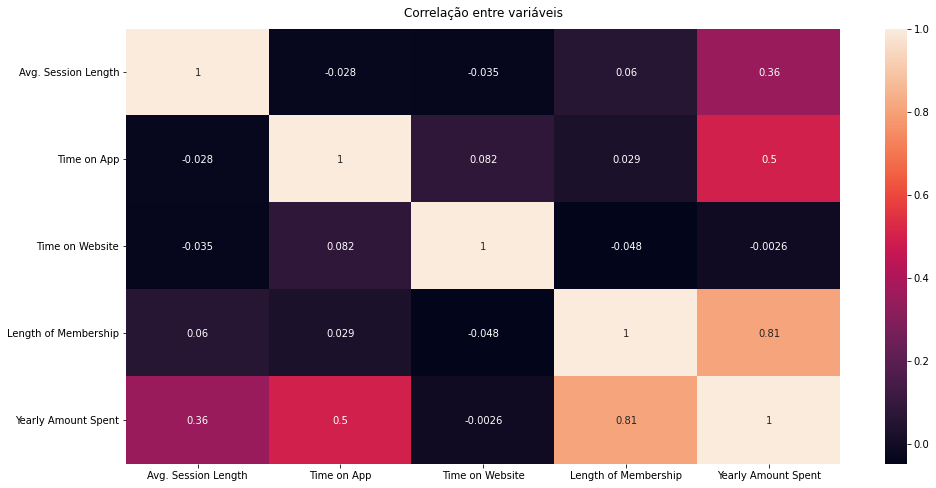

In [52]:
# Correlação entre as variáveis
plt.figure(figsize = (16,8))
heatmap = sns.heatmap(data.corr(), annot=True)
heatmap.set_title('Correlação entre variáveis', fontdict={'fontsize':12}, pad=12);

## Modelo de árvore de decisão regressão

In [9]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

In [10]:
# Dividindo as variáveis independentes da target
X = data.drop(columns=['Yearly Amount Spent'])
y = data['Yearly Amount Spent']

print(X.shape, y.shape)

(500, 4) (500,)


In [11]:
# Dividindo os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [12]:
# Avaliando o melhor valor para usar no parâmetro 'min_sample_leaf'
mse_variance = []
for t in range(1,20):
  model = DecisionTreeRegressor(min_samples_leaf=t, random_state=0)
  model.fit(x_train, y_train)
  p = model.predict(x_test)
  msqe = mean_squared_error(y_test, p)
  mse_variance.append(np.sqrt(msqe))

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline 

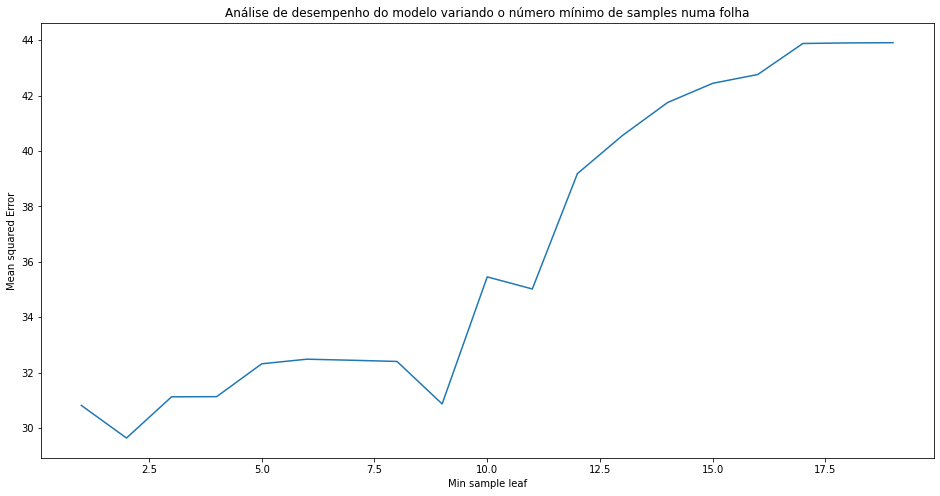

In [53]:
# Plot de gráfico
plt.figure(figsize=(16,8))
plt.plot(range(1,20), mse_variance)
plt.title('Análise de desempenho do modelo variando o número mínimo de samples numa folha')
plt.xlabel('Min sample leaf')
plt.ylabel('Mean squared Error')
plt.show()

In [14]:
# Criando o modelo de árvore de decisão de regressão
tree = DecisionTreeRegressor(min_samples_leaf=2, random_state=0)
tree.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_leaf=2, random_state=0)

In [15]:
# Predição dos valores utilizando os dados de teste
pred = tree.predict(x_test)
print(pred)

[445.3242024  473.89944632 408.41735708 509.80384936 509.80384936
 466.13868506 407.14618486 379.45647429 492.98215021 601.4080781
 539.44363864 544.53562115 537.04120165 434.49383349 457.42321036
 446.40298666 551.26081135 408.08117792 551.26081135 477.21447792
 663.17062127 522.99309376 398.32254817 568.54437035 551.26081135
 402.23015747 445.3242024  366.00701165 572.49031099 440.32439425
 564.41213344 506.25170266 535.95193986 473.89944632 476.54621661
 405.3961836  537.04120165 448.2975811  569.49104866 407.14618486
 521.45384856 576.55314628 609.19992487 570.83167751 397.46390092
 408.08117792 526.92714538 440.563145   506.25170266 398.32254817
 487.22931136 416.86659881 552.99420461 491.41441474 448.2975811
 476.54621661 553.91007491 312.70543289 585.04552489 469.76686785
 476.54621661 456.28484765 494.99329918 555.49464845 508.59909268
 379.45647429 407.14618486 457.42321036 629.24302132 431.73664036
 456.28484765 676.15525868 468.22873368 481.95260524 408.41735708
 434.7212338

In [16]:
# Calculando o erro quadrático médio
mse = mean_squared_error(y_test, pred)
print(f"O erro quadrático médio é de {np.sqrt(mse):.4f}")

O erro quadrático médio é de 29.6348


In [17]:
# Calculando o score do modelo
score = tree.score(x_test, y_test)
print(f"O score é de {score*100:.2f}%")

O score é de 86.00%


In [26]:
# Calculando a média dos valores da score através da validação cruzada
cvs = cross_val_score(tree, x_train, y_train, cv=10)
print(f"Média dos valores da score ao realizar a validção cruzada é de {np.mean(cvs)*100:.4f}%")

Média dos valores da score ao realizar a validção cruzada é de 83.3002%


[Text(0.5087151394422311, 0.9583333333333334, 'Length of Membership <= 3.591\nsquared_error = 6262.812\nsamples = 350\nvalue = 501.617'),
 Text(0.1797808764940239, 0.875, 'Length of Membership <= 2.626\nsquared_error = 3681.612\nsamples = 179\nvalue = 449.79'),
 Text(0.050962815405046484, 0.7916666666666666, 'Time on App <= 11.031\nsquared_error = 3120.135\nsamples = 50\nvalue = 390.151'),
 Text(0.021248339973439574, 0.7083333333333334, 'Length of Membership <= 1.876\nsquared_error = 1318.394\nsamples = 9\nvalue = 316.957'),
 Text(0.010624169986719787, 0.625, 'Avg. Session Length <= 33.252\nsquared_error = 386.597\nsamples = 4\nvalue = 284.729'),
 Text(0.005312084993359893, 0.5416666666666666, 'squared_error = 92.62\nsamples = 2\nvalue = 266.295'),
 Text(0.01593625498007968, 0.5416666666666666, 'squared_error = 0.947\nsamples = 2\nvalue = 303.163'),
 Text(0.03187250996015936, 0.625, 'Time on Website <= 36.815\nsquared_error = 568.143\nsamples = 5\nvalue = 342.74'),
 Text(0.026560424966

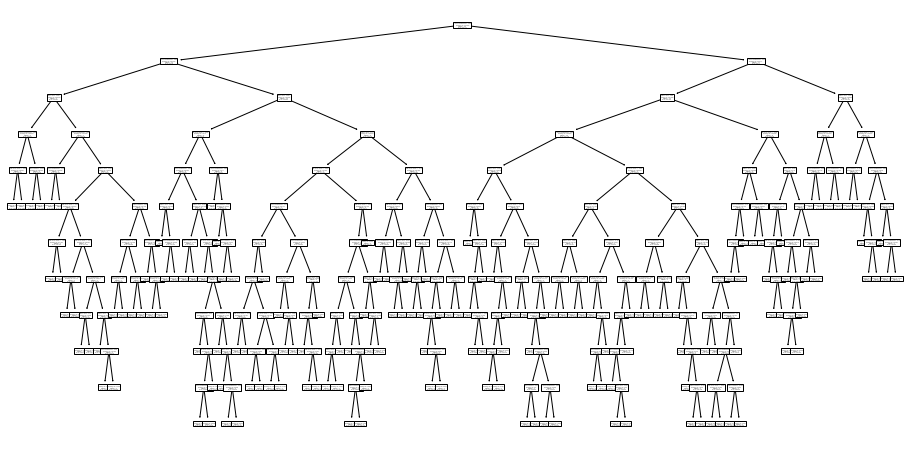

In [54]:
# Plot da árvore de decisão criada
plt.figure(figsize=(16,8))
plot_tree(tree, feature_names=X.columns)

Text(0, 0.5, 'Valores reais')

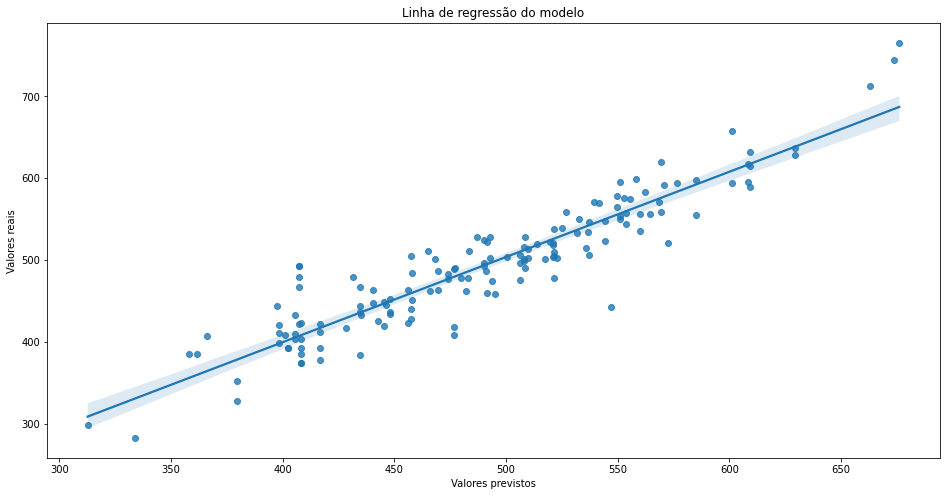

In [58]:
# Plot do gráfico
plt.figure(figsize=(16,8))
sns.regplot(x=pred, y=y_test)
plt.title('Linha de regressão do modelo')
plt.xlabel('Valores previstos')
plt.ylabel('Valores reais')

Através dos experimentos realizados é possível obter um modelo que possui,
* erro quadrático médio de **29.6348**
* score de **86%**
* média de score da validação cruzada de **83,3%**

Portanto, o modelo de árvore de decisão de regressão criado possui um desempenho satisfatório para o problema. 